In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import train_test_split 

df = pd.read_csv('heart.csv') 
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
X = df[df.columns[:-1]] 
y = df.target
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0) 

In [4]:
X_train = X_train.copy() 
X_test = X_test.copy() 
for col in X_train.columns: 
    X_train[col] = (X_train[col]-min(X_train[col]))/ (max(X_train[col]) - min(X_train[col])) 
for col in X_test.columns: 
    X_test[col] = (X_test[col]-min(X_test[col]))/ (max(X_test[col]) - min(X_test[col]))   

In [5]:
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear') 
model_log = logreg.fit(X_train,y_train) 
print(model_log)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')


In [6]:
y_hat_test = logreg.predict(X_test) 
print(y_hat_test)

[0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0
 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0
 0 1]


In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Creating the confusion matrix

In [11]:
def conf_matrix(y_true,y_pred): 
    cm ={'TP':0,'TN':0,'FP':0,'FN':0}
     
    for ind, label in enumerate(y_true):
        pred = y_pred[ind] 
        if label == 1:
            #TP.
            if label == pred: 
                cm['TP'] +=1
            #FP 
            else:
                 cm['FN'] +=1
        else:
            #TN
            if label == pred:
                cm['TN'] +=1 
            else: 
            #FN
                cm['FP'] +=1 
    return cm
conf_matrix(y_test,y_hat_test)

{'TP': 38, 'TN': 26, 'FP': 7, 'FN': 5}

In [12]:
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(y_test,y_hat_test) 
print('Confusion Matrix:\n',cnf_matrix)

Confusion Matrix:
 [[26  7]
 [ 5 38]]


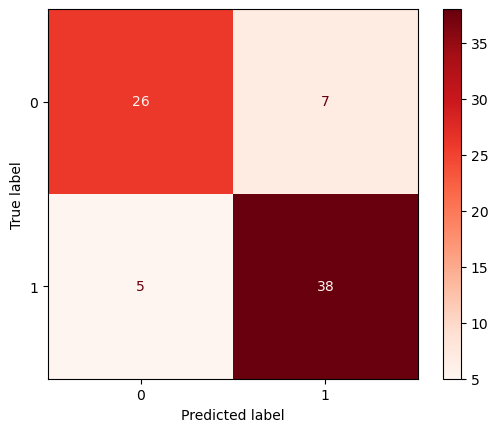

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay 
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels = model_log.classes_) 
disp.plot(cmap = plt.cm.Reds)